In [ ]:
#####################################
#   Dataset - Titanic Data          #
#####################################

# Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board 
# the Titanic. 

In [ ]:
#####################################
#            Questions              #
#####################################
# Are the following factors significiant to survival? sex, pclass, age, sibsp, parch, fare, cabin?


In [ ]:
#####################################
#          Analysize Data           #
#####################################

1 122
2 108
3 347


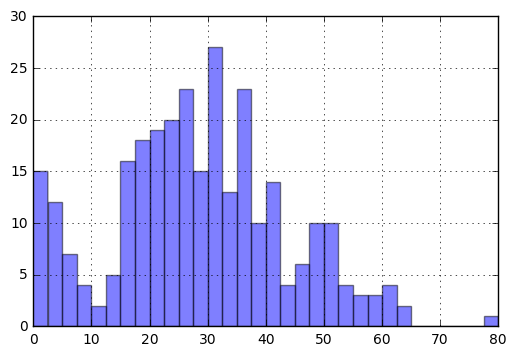

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('../csv/train.csv', header=0)
df.head(3)
type(df)
df.dtypes
#df.info()
#df.describe()
df['Age'][0:10]
df[0:10]
type(df['Age'])
df['Age'].mean()
df['Age'].median()
df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age', 'Survived']]

for i in range(1, 4):
    print i, len(df[(df['Sex'] == 'male') & (df['Pclass'] == i) ])
   
import pylab as p
df[df['Survived'] == 1]['Age'].dropna().hist(bins=32, range=(0,80), alpha=.5)
p.show()

In [101]:
# cleaning data

df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )

df['Gender'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)
df.head(5)

df['Port'] = df['Embarked'].map({'S':1, 'C':2, 'Q':3}).map('{:.0f}'.format) # still not int type
df.head(6)



KeyError: 'Sex'

In [66]:
# cleaning up missing age
# replace null age with median age of passengers' own class median ages

# median_ages for different cl
median_ages = np.zeros((2, 3))
median_ages

for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i, j] = df[ (df['Gender'] == i) & (df['Pclass'] == j+1) ]['Age'].dropna().median()
       
median_ages

# make a copy of Age column
df['AgeFill'] = df['Age']
df.head()

# replace null age with class's median ages
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df['Age'].isnull()) & (df['Gender'] == i) & (df['Pclass'] == j+1), 'AgeFill' ] = median_ages[i, j]

df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

# make a note column of original null age 
df['AgeIsNull'] = pd.isnull(df.Age).astype(int)
df.head(20)

df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,29.112424,0.198653
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,13.304424,0.399210
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400,0.000000,21.500000,0.000000
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,1.000000,26.000000,0.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000,1.000000,36.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,80.000000,1.000000


In [61]:
df[ df['Embarked'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill


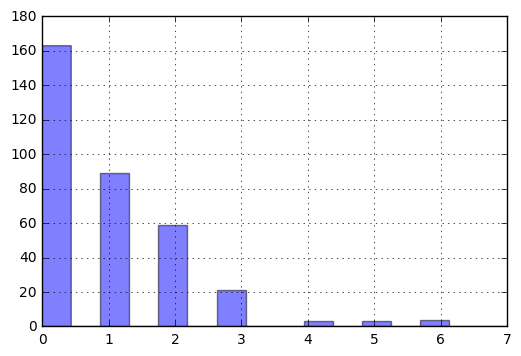

In [79]:
# Features Engineering
df['FamilySize'] = df['SibSp'] + df['Parch']
df[ df['Survived'] == 1 ]['FamilySize'].hist(bins=16, range=(0,7), alpha=.5)
p.show()


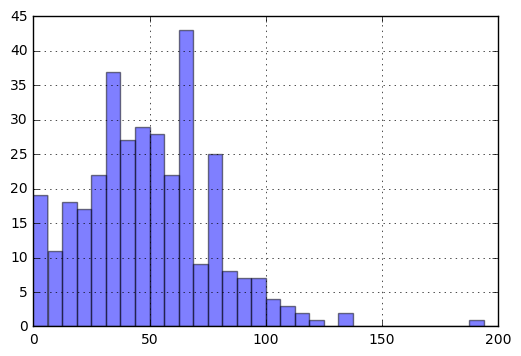

In [81]:
df['Age*Class'] = df.AgeFill * df.Pclass
df[ df['Survived'] == 1 ]['Age*Class'].hist(bins=32, range=(0,200), alpha=.5)
p.show()

In [95]:
# Final Preparation for Machine learning
df.dtypes[df.dtypes.map(lambda x: x == 'object')]


Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Port        object
dtype: object

In [ ]:
df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) 
df = df.drop(['Age'], axis=1)
df = df.dropna()

train_data = df.values()

In [100]:
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class,Port
0,1,0,3,1,0,7.2500,1,22.0,0,1,66.0,1
1,2,1,1,1,0,71.2833,0,38.0,0,1,38.0,2
2,3,1,3,0,0,7.9250,0,26.0,0,0,78.0,1
3,4,1,1,1,0,53.1000,0,35.0,0,1,35.0,1
4,5,0,3,0,0,8.0500,1,35.0,0,0,105.0,1
